In [2]:
import numpy
import pylab
import matplotlib
%matplotlib inline

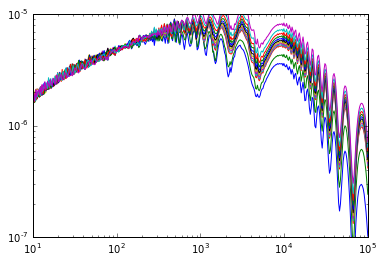

In [3]:
#bs=['0.0','0.1','0.2','0.3','0.4','0.5','0.6','0.7','0.8','0.9','0.91','0.92','0.93','0.94','0.95','0.96','0.97','0.98','0.99']
bs=['0.7','0.8','0.9','0.91','0.92','0.93','0.94','0.95','0.96','0.97','0.98','0.99']
for b in bs:
    Averaged=numpy.load("../neo_propagated/antineutrino_averaged_flux_"+str(b)+".npz")['arr_0']
    Es=numpy.logspace(1,5,len(Averaged[:,0]))
    pylab.loglog(Es,pow(Es,3)*Averaged[:,0]/1e4)
    pylab.ylim(1e-7,1e-5)
    
    

/Users/jonesb/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:15: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.


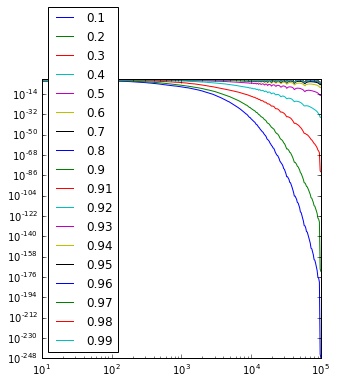

In [5]:
flav=1
pylab.figure(figsize=(5,5))
bs=['0.0','0.1','0.2','0.3','0.4','0.5','0.6','0.7','0.8','0.9','0.91','0.92','0.93','0.94','0.95','0.96','0.97','0.98','0.99']
Totals=[]
AllSums=[]
for top in range(1,len(bs)):
    Sum=None
    Es=None
    Es3=None
    for i in range(0,top):
        Averaged=numpy.load("../neo_propagated/neutrino_averaged_flux_"+str(bs[i])+".npz")['arr_0']
        b=(float(bs[i+1])+float(bs[i]))/2.
        db=float(bs[i+1])-float(bs[i])
        dSum= b*db*Averaged[:,flav]
        if(Sum==None):
            Es=numpy.logspace(1,5,len(Averaged[:,flav]))
            Es3=pow(Es,3)
            Sum=dSum*Es3
        else:
            Sum=Sum+dSum*Es3
      #  print b, db,b*db*sum(Averaged[:,flav]*Es3)


    dblast=1-float(bs[i+1])
    blast=(1+float(bs[i+1]))/2.
    Sum=Sum+blast*dblast*Averaged[:,flav]*Es3
    AllSums.append(Sum)
    Totals.append(sum(Sum*Es3))
    pylab.loglog(Es,Sum,label=bs[top])
    pylab.legend(loc='lower left')

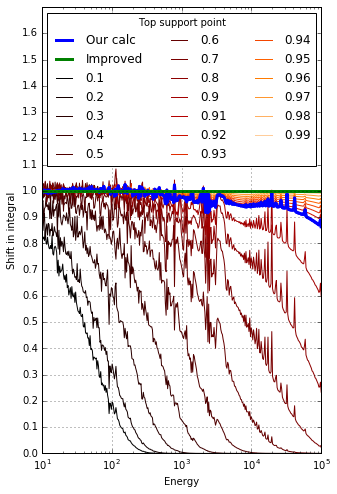

In [7]:


cmap = pylab.get_cmap('gist_heat')
Colors=cmap(numpy.linspace(0,0.9,len(AllSums)))
pylab.figure(figsize=(5,8))
pylab.plot(Es, numpy.array(AllSums[9])/numpy.array(AllSums[-1]),color='blue',linewidth=3,label='Our calc')
pylab.plot([10,1e5],[1,1],color='green',linewidth=3,label='Improved')



for i in range(0,len(AllSums)):
    pylab.plot(Es, numpy.array(AllSums[i])/numpy.array(AllSums[-1]),label=float(bs[i+1]),color=Colors[i])
    pylab.ylabel("Shift in integral")
    pylab.xlabel("Energy")
#    pylab.ylim(-0.02,0.25)
pylab.ylim(0,1.7)
pylab.grid()
pylab.yticks(numpy.arange(0,1.7,0.1))
pylab.plot(Es, numpy.array(AllSums[9])/numpy.array(AllSums[-1]),color='blue',linewidth=3)
pylab.plot([10,1e5],[1,1],color='green',linewidth=3)

pylab.semilogx()
pylab.legend(loc='upper center',title='Top support point',ncol=3)
pylab.show()


In [15]:

def MakeIntegratedFlux(Path,nunub):
    Sums=[]
    for flav in range(0,3):
        bs=['0.0','0.1','0.2','0.3','0.4','0.5','0.6','0.7','0.8','0.9']
        Sum=None
        Es=None
        for i in range(0,len(bs)-1):
            if(nunub==0):
                Averaged=numpy.load(Path+"/neutrino_averaged_flux_"+str(bs[i])+".npz")['arr_0']
            else:
                Averaged=numpy.load(Path+"/antineutrino_averaged_flux_"+str(bs[i])+".npz")['arr_0']
            b=(float(bs[i+1])+float(bs[i]))/2.
            db=float(bs[i+1])-float(bs[i])
            dSum= b*db*Averaged[:,flav]
            if(Sum==None):
                Es=numpy.logspace(1,5,len(Averaged[:,flav]))
                Sum=dSum
            if(Sums==[]):
                Sums.append(Es)
            else:
                Sum=Sum+dSum
        dblast=1.-float(bs[-1])
        blast=(1.+float(bs[-1]))/2.
        Sum=Sum+blast*dblast*Averaged[:,flav]    
        Sums.append(Sum)
    if(nunub==0):
        numpy.savetxt(Path+"/IntegratedNu.dat",Sums)
    else:
        numpy.savetxt(Path+"/IntegratedNubar.dat",Sums)

In [16]:
MakeIntegratedFlux("../neo_propagated/",0)

/Users/jonesb/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:16: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.


In [18]:
import os
for thedir in os.listdir("../propagated/"):
    if os.path.isdir("../propagated/"+thedir):
        MakeIntegratedFlux("../propagated/"+thedir,0)
        MakeIntegratedFlux("../propagated/"+thedir,1)

/Users/jonesb/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:16: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
